In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold,cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('secondary_data.csv', sep=';')

In [3]:
df.sample(5)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
31178,e,8.80,x,s,n,f,e,c,w,8.18,...,NaN,i,w,NaN,NaN,f,f,p,d,u
19780,p,5.33,x,i,o,f,e,NaN,y,7.18,...,NaN,NaN,o,NaN,NaN,f,f,NaN,g,u
19966,p,5.12,b,s,o,f,e,NaN,y,6.23,...,NaN,NaN,k,NaN,NaN,f,f,NaN,g,a
19180,p,4.34,x,s,o,f,a,c,y,5.64,...,NaN,g,o,NaN,NaN,f,f,NaN,g,u
45065,p,3.24,b,y,n,f,NaN,c,g,5.85,...,s,s,w,NaN,NaN,f,f,NaN,d,u


In [6]:
def summarize_dataframe(df):
    # Calculate the total number of non-null values in each column
    non_null_counts = df.count()

    # Calculate the total number of null values in each column
    null_counts = df.isnull().sum()

    # Calculate the percentage of null values in each column
    null_percentages = (null_counts / len(df)) * 100
    
    # Format the null percentages as percentages
    null_percentages = null_percentages.apply(lambda x: '{:.{}f}%'.format(x, 2))

    # Get the data types of each column
    dtypes = df.dtypes

    # Create a summary DataFrame
    summary_df = pd.DataFrame({
        'Data Type': dtypes,
        'Non-Null Count': non_null_counts,
        'Null Count': null_counts,
        'Null Percentage': null_percentages
    })
    return summary_df

In [7]:
summarize_dataframe(df)

,Data Type,Non-Null Count,Null Count,Null Percentage
class,object,61069,0,0.00%
cap-diameter,float64,61069,0,0.00%
cap-shape,object,61069,0,0.00%
cap-surface,object,46949,14120,23.12%
cap-color,object,61069,0,0.00%
does-bruise-or-bleed,object,61069,0,0.00%
gill-attachment,object,51185,9884,16.18%
gill-spacing,object,36006,25063,41.04%
gill-color,object,61069,0,0.00%
stem-height,float64,61069,0,0.00%


In [22]:
# dropping four columns where are Nan's
df.drop(['stem-root', 'stem-surface', 'veil-color','spore-print-color'], axis=1, inplace=True)

# Data analysis and dealing with missing values

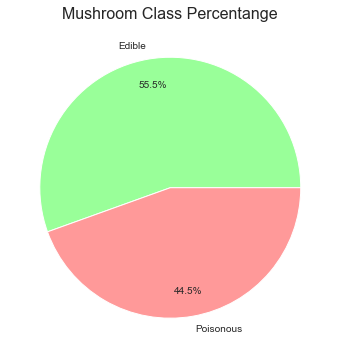

In [17]:
# create pie chart
clas = dict(df.groupby('class')['class'].count())
labels = ['Edible', 'Poisonous']
colors = ['#99ff99', '#ff9999']
values = clas.values()
plt.figure(figsize=(6,6))
plt.pie(data=df, x=values, labels=labels, autopct = '%1.1f%%', pctdistance=0.8, colors=colors)
plt.title('Mushroom Class Percentange', fontsize=16)
plt.show()

In [15]:
# Changing class names to numbers e (edibile) to 1 and p (poisonous) to 0
df['class'] = df['class'].replace({'e': 1, 'p':0}).astype('int8')

### 1/20 Cap-diameter (float number in cm)

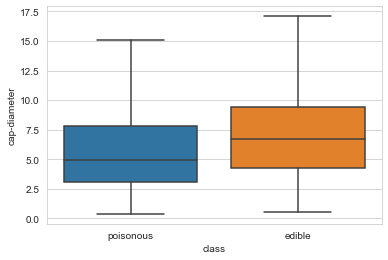

In [27]:
sns.color_palette("Set2")
g=sns.boxplot(x='class', y='cap-diameter', data=df, showfliers=False)
g.set(xticklabels=('poisonous', 'edible'))
plt.show()

### 2/20 Cap-shape

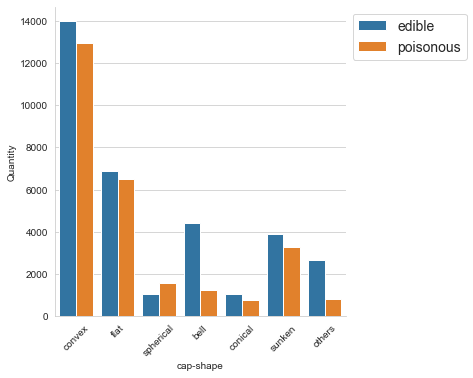

In [25]:
# Create the catplot chart with value counts
g=sns.catplot(x='cap-shape', data=df, kind='count', hue='class', legend=None)
g.set(xlabel= "cap-shape" ,ylabel = 'Quantity', 
      xticklabels=('convex', 'flat', 'spherical', 'bell', 'conical', 'sunken', 'others'))
plt.xticks(rotation=45)
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 3/20 Cap-surface

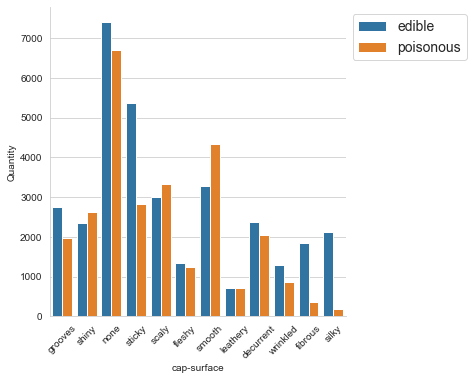

In [36]:
# changing Nan's to zeros and replacing to none info = f
df['cap-surface'] = df['cap-surface'].fillna(0).replace({0: 'f'})

# Create the catplot chart with value counts
g=sns.catplot(x='cap-surface', data=df, kind='count', hue='class', legend=None)
g.set(xlabel= "cap-surface" ,ylabel = 'Quantity', 
      xticklabels=('grooves', 'shiny', 'none', 'sticky', 'scaly', 'fleshy', 
                   'smooth', 'leathery', 'decurrent', 'wrinkled', 'fibrous', 'silky'))
plt.xticks(rotation=45)
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 4/20 cap-color

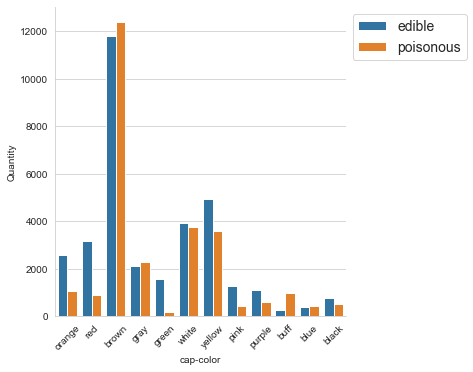

In [37]:
# Create the catplot chart with value counts
g=sns.catplot(x='cap-color', data=df, kind='count', hue='class', legend=None)
g.set(xlabel= "cap-color" ,ylabel = 'Quantity', xticklabels=('orange', 'red', 'brown', 
    'gray', 'green', 'white', 'yellow', 'pink', 'purple', 'buff', 'blue', 'black'))
plt.xticks(rotation=45)
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 5/20 does_bruise_or_bleed: bruises-or-bleeding=true, no=false

<Figure size 864x720 with 0 Axes>

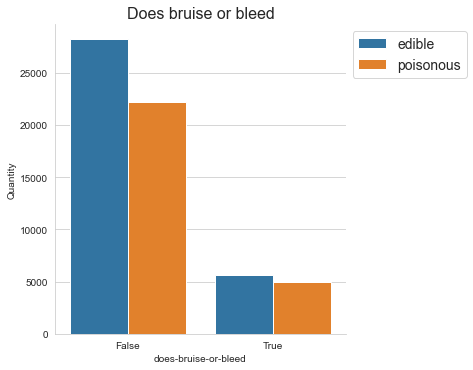

In [38]:
# Create the catplot chart with value counts
plt.figure(figsize=(12,10))
g = sns.catplot(x='does-bruise-or-bleed', data=df, kind='count', hue='class', legend=False)
g.set(xlabel= "does-bruise-or-bleed" ,ylabel = 'Quantity', xticklabels=('False', 'True'))
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Does bruise or bleed', fontsize=16)
plt.show()

### 6/20 Gill-attachment

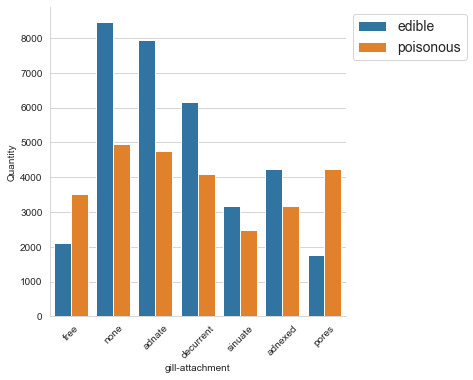

In [39]:
# changing Nan's to zeros and pelacing to none = f
df['gill-attachment'] = df['gill-attachment'].fillna(0).replace({0: 'f'})

# Create the catplot chart with value counts
g = sns.catplot(x='gill-attachment', data=df, kind='count', hue='class', legend=False)
g.set(xlabel= "gill-attachment" ,ylabel = 'Quantity', 
      xticklabels=('free', 'none', 'adnate', 'decurrent', 'sinuate', 'adnexed', 'pores'))
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

### 7/20 Gill-spacing:  close=c, distant=d, none=f

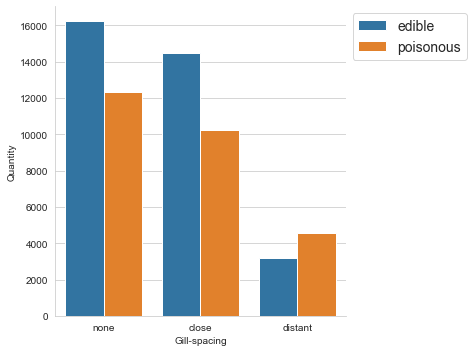

In [40]:
# changing Nan's to zeros and pelacing to none - f
df['gill-spacing'] = df['gill-spacing'].fillna(0).replace({0: 'f'})

# Create the catplot chart with value counts
g = sns.catplot(x='gill-spacing', data=df, kind='count', hue='class', legend=False)
g.set(xlabel= "Gill-spacing" ,ylabel = 'Quantity', xticklabels=('none', 'close', 'distant'))
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 8/20 gill-color

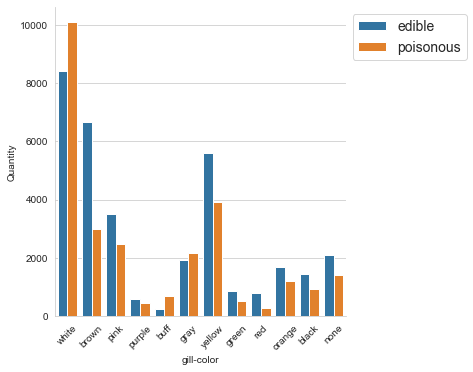

In [41]:
# Create the catplot chart with value counts
g=sns.catplot(x='gill-color', data=df, kind='count', hue='class', legend=None)
g.set(xlabel= "gill-color" ,ylabel = 'Quantity', xticklabels=('white', 'brown', 'pink', 'purple', 'buff', 'gray', 
                                'yellow', 'green', 'red',  'orange', 'black', 'none'))
plt.xticks(rotation=45)
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 9-10/20 stem-height (in cm) and stem-width (in mm)

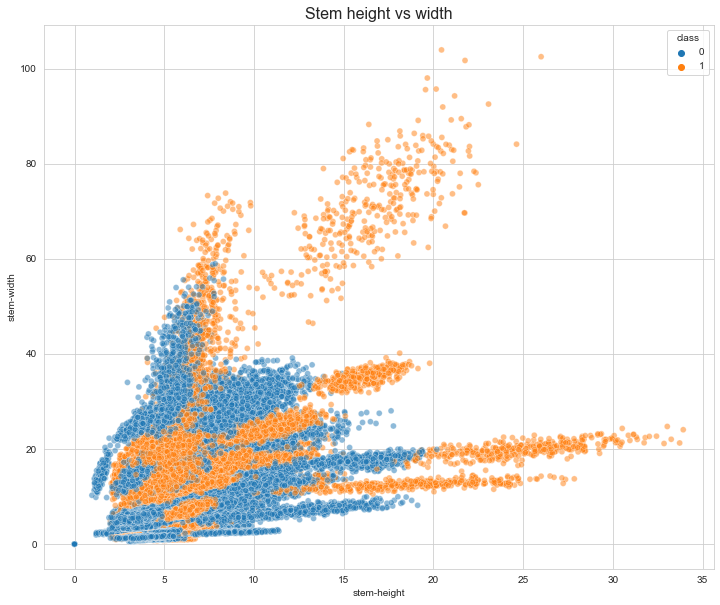

In [42]:
# Create the scatterplot chart
plt.figure(figsize=(12,10))
sns.scatterplot(x='stem-height', y='stem-width', data=df, hue='class', alpha=0.5)
plt.title('Stem height vs width', fontsize=16)
plt.show()

### 13/20 stem-color

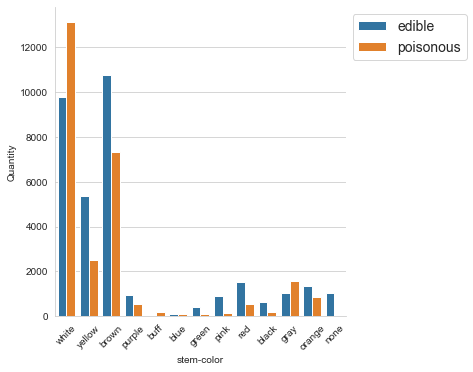

In [43]:
# Create the catplot chart with value counts
g=sns.catplot(x='stem-color', data=df, kind='count', hue='class', legend=None)
g.set(xlabel= "stem-color" ,ylabel = 'Quantity', xticklabels=('white', 'yellow', 'brown', 'purple', 'buff', 
                                                'blue', 'green', 'pink', 'red', 'black', 'gray', 'orange', 'none'))
plt.xticks(rotation=45)
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 14/20 veil-type:  partial=p, universal=u

In [29]:
df['veil-type'].value_counts()

u    3177
Name: veil-type, dtype: int64

In [30]:
# there are only values 'u'. Changing Nan to 0 and 'u' to 1
df['veil-type']=df['veil-type'].fillna(0)
df['veil-type'] = df['veil-type'].replace({'u': 1})

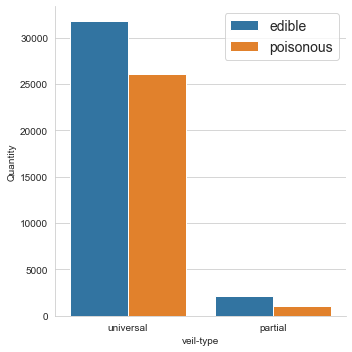

In [31]:
# Create the catplot chart with value counts
g = sns.catplot(x='veil-type', data=df, kind='count', hue='class', legend=False)
g.set(xlabel= "veil-type" ,ylabel = 'Quantity', xticklabels=('universal', 'partial'))
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper right')
plt.show()

### 16/20 has-ring:  ring=t, none=f

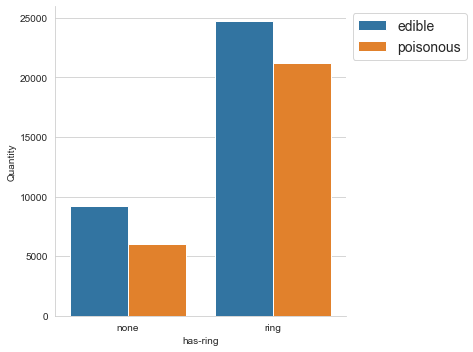

In [32]:
# Create the catplot chart with value counts
g = sns.catplot(x='has-ring', data=df, kind='count', hue='class', legend=False)
g.set(xlabel= "has-ring" ,ylabel = 'Quantity', xticklabels=('none', 'ring'))
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 17/20 ring-type

In [33]:
# changing Nan's to zeros and pelacing to none - f
df['ring-type']=df['ring-type'].fillna(0).replace({0: 'f'})
df['ring-type'].isna().sum()

0

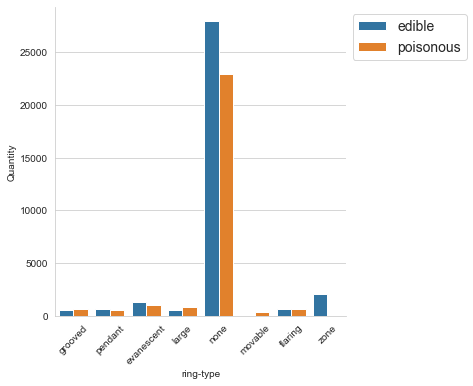

In [34]:
# Create the catplot chart with value counts
g=sns.catplot(x='ring-type', data=df, kind='count', hue='class', legend=None)
g.set(xlabel= "ring-type" ,ylabel = 'Quantity', 
      xticklabels=('grooved', 'pendant', 'evanescent', 'large', 'none', 'movable', 'flaring', 'zone'))
plt.xticks(rotation=45)
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 19/20 habitat

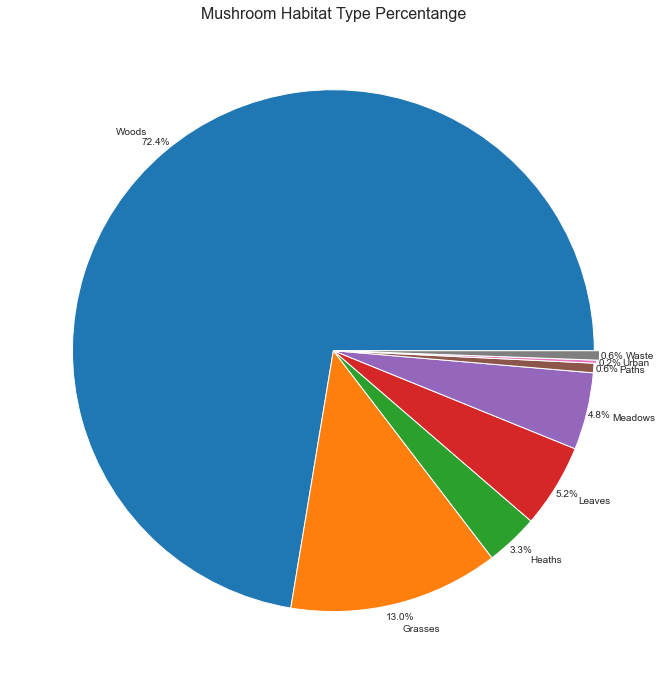

In [35]:
hab = dict(df.groupby('habitat')['habitat'].count())
labels = ['Woods', 'Grasses', 'Heaths', 'Leaves', 'Meadows', 'Paths','Urban', 'Waste']
values = hab.values()
plt.figure(figsize=(12,12))
explode = [0,0.,0,0,0, 0, 0.01, 0.02]
plt.pie(data=df, x=values, labels= labels, explode=explode, autopct = '%1.1f%%', pctdistance=1.05)
plt.title('Mushroom Habitat Type Percentange', fontsize=16)
plt.show()

### 20/20 season

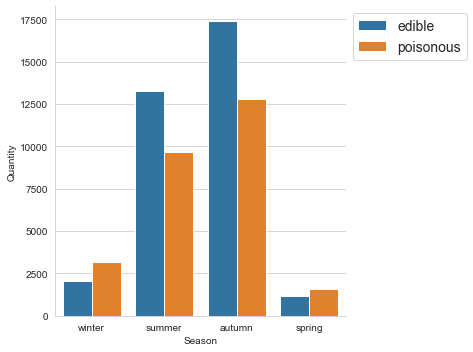

In [44]:
# Create the catplot chart with value counts
g = sns.catplot(x='season', data=df, kind='count', hue='class', legend=False)
g.set(xlabel= "Season" ,ylabel = 'Quantity', xticklabels=('winter', 'summer', 'autumn', 'spring'))
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int8   
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-color            61069 non-null  object 
 12  veil-type             61069 non-null  int64  
 13  has-ring              61069 non-null  object 
 14  ring-type             61069 non-null  object 
 15  habitat            

## Data preprocessing

In [46]:
# one hot encoding
ohe = pd.get_dummies(data=df, columns=['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 
        'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring','ring-type', 'habitat', 'season'])
ohe.shape

In [48]:
y=ohe.pop('class')
X=ohe

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [55]:
# Scalling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
seed = 123
models =[("LR", LogisticRegression(random_state=seed)),("KNN",KNeighborsClassifier()), ("SVM", SVC(random_state=seed)),
         ("XGB", XGBClassifier(random_state=seed)), ("DTC", DecisionTreeClassifier()),
         ('ADA',AdaBoostClassifier(random_state=seed)), ("GB",GradientBoostingClassifier(random_state=seed)),
         ("GNB", GaussianNB()), ("RDG", RidgeClassifier()), ("SGD", SGDClassifier(random_state=seed))]

results_roc_train = []
results_roc_test = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results_train = model.predict(X_train)
    score_train = roc_auc_score(y_train, model_results_train)
    model_results_test = model.predict(X_test)
    score_test = roc_auc_score(y_test, model_results_test)
    results_roc_train.append(score_train)
    results_roc_test.append(score_test)
    names.append(name)
    finalResults.append((name,score_train,score_test))

In [61]:
# print the results on train and test set
df_results = pd.DataFrame(data=finalResults, 
                          columns=['Model', 'ROC AUC sore on train set', 'ROC AUC sore on test set'])
print(df_results)

  Model  ROC AUC sore on train set  ROC AUC sore on test set
0   KNN                   0.999977                  0.999909
1   XGB                   0.999954                  0.999652
2   DTC                   1.000000                  0.997939
3   SVM                   0.997099                  0.996963
4    GB                   0.933312                  0.929912
5   ADA                   0.802828                  0.799376
6   SGD                   0.792656                  0.788094
7   RDG                   0.781353                  0.777773
8    LR                   0.779810                  0.774941
9   GNB                   0.633249                  0.626637


## Checking the overfitting

In [65]:
knn=KNeighborsClassifier()
MSE_CV = - cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1, verbose=1)
knn.fit(X_train, y_train)
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)
print('CV MSE: {:.5f}'.format(MSE_CV.mean()))
print('Train MSE: {:.5f}'.format(MSE(y_train, y_pred_train_knn)))
print('Test MSE: {:.5f}'.format(MSE(y_test, y_pred_test_knn)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    3.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.4s finished


CV MSE: 0.00020
Train MSE: 0.00002
Test MSE: 0.00008


In [66]:
xgb=XGBClassifier(random_state=123)
MSE_CV = - cross_val_score(xgb, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1, verbose=1)
xgb.fit(X_train, y_train)
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)
print('CV MSE: {:.6f}'.format(MSE_CV.mean()))
print('Train MSE: {:.6f}'.format(MSE(y_train, y_pred_train_xgb)))
print('Test MSE: {:.6f}'.format(MSE(y_test, y_pred_test_xgb)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   33.4s remaining:   22.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   53.1s finished


CV MSE: 0.000430
Train MSE: 0.000041
Test MSE: 0.000327


In [67]:
dtc=DecisionTreeClassifier()
MSE_CV = - cross_val_score(dtc, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1, verbose=1)
dtc.fit(X_train, y_train)
y_pred_train_dtc = dtc.predict(X_train)
y_pred_test_dtc = dtc.predict(X_test)
print('CV MSE: {:.5f}'.format(MSE_CV.mean()))
print('Train MSE: {:.5f}'.format(MSE(y_train, y_pred_train_dtc)))
print('Test MSE: {:.5f}'.format(MSE(y_test, y_pred_test_dtc)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.9s finished


CV MSE: 0.00205
Train MSE: 0.00000
Test MSE: 0.00229


#### For KNN, XGB and DTC:  CV MSE  >> Train MSE that means overfitting, beacause of high variance

In [62]:
svm=SVC(random_state=123)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
auc=roc_auc_score(y_test, y_pred_svm)
print('AUC: %.3f' % auc)

AUC: 0.997


In [64]:
MSE_CV = - cross_val_score(svm, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)
print('CV MSE: {:.4f}'.format(MSE_CV.mean()))
print('Train MSE: {:.4f}'.format(MSE(y_train, y_pred_train)))
print('Test MSE: {:.4f}'.format(MSE(y_test, y_pred_test)))

CV MSE: 0.0032
Train MSE: 0.0028
Test MSE: 0.0030


#### CV MSE ~ Train MSE ~ Test MSE - model is ok

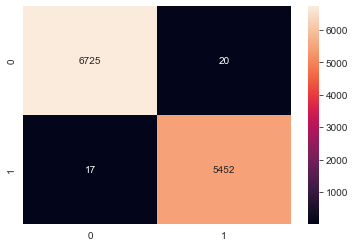

In [69]:
svm_cm=confusion_matrix(y_test, y_pred_svm)
sns.heatmap(svm_cm, annot=True, fmt='d')
plt.show()

In [68]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6745
           1       1.00      1.00      1.00      5469

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



## GradientBoosting Classifier hyperparameter tuning

In [70]:
gb=GradientBoostingClassifier(random_state=123)
MSE_CV = - cross_val_score(gb, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
gb.fit(X_train, y_train)
y_pred_train_gb = gb.predict(X_train)
y_pred_test_gb = gb.predict(X_test)
print('CV MSE: {:.4f}'.format(MSE_CV.mean()))
print('Train MSE: {:.4f}'.format(MSE(y_train, y_pred_train_gb)))
print('Test MSE: {:.4f}'.format(MSE(y_test, y_pred_test_gb)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   49.4s remaining:   32.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished


CV MSE: 0.0680
Train MSE: 0.0652
Test MSE: 0.0685


#### CV MSE ~ Train MSE ~ Test MSE - model is ok

In [72]:
print(classification_report(y_test, y_pred_test_gb))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6745
           1       0.93      0.91      0.92      5469

    accuracy                           0.93     12214
   macro avg       0.93      0.93      0.93     12214
weighted avg       0.93      0.93      0.93     12214



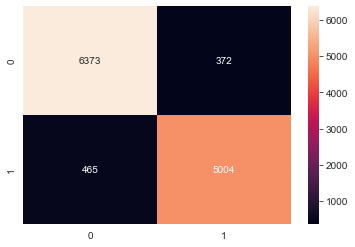

In [73]:
gb_cm=confusion_matrix(y_test, y_pred_test_gb)
sns.heatmap(gb_cm, annot=True, fmt='d')
plt.show()

In [82]:
param_grid_GB = {'learning_rate': [0.01, 0.1],
                 'n_estimators': [100, 200],
                 'max_depth': [3, 4],
                 'random_state': [123]
                }

grid_GB = GridSearchCV(gb, param_grid_GB, cv=5, n_jobs=-1, scoring='roc_auc', verbose=1)
grid_GB.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 4],
                         'n_estimators': [100, 200], 'random_state': [123]},
             scoring='roc_auc', verbose=1)

In [83]:
# create a model with best parameters
grid_gb_results_test = grid_GB.best_estimator_.predict(X_test)

print('ROC AUC score in test set: {:.3f}'.format(roc_auc_score(y_test, grid_gb_results_test)))

confusion_matrix(y_test, gb_results_optuna)

ROC AUC score in test set: 0.988


array([[6744,    1],
       [   2, 5467]], dtype=int64)

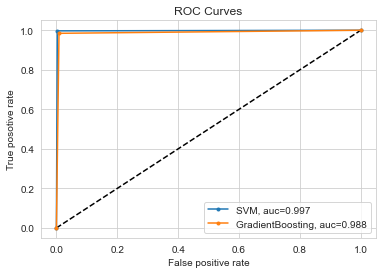

In [84]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_svm)
fpr2, tpr2, thresholds2 = roc_curve(y_test, grid_gb_results_test)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, marker='.', label='SVM, auc='+str(round(roc_auc_score(y_test, y_pred_svm),3)))
plt.plot(fpr2, tpr2, marker='.', label='GradientBoosting, auc='+str(round(roc_auc_score(y_test, grid_gb_results_test),3)))
plt.xlabel('False positive rate')
plt.ylabel('True posotive rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# SUMMARY:
   ## - KNeighborsClassifier, DecisionTreeClassifier, XGBClassifier - those models were overfitted
   ## - SVM and GradientBoostingClassifier gives roc_auc_score about 99%